# Task 1: Stock Price Prediction

In [ ]:
#training dATAset creation code
import yfinance as yf

# Replace 'AAPL' with the stock symbol of the company you're interested in
symbol = 'AAPL'

# Download historical stock price data from Yahoo Finance
data = yf.download(symbol, start='2022-01-01', end='2023-01-01')

# Save the data to a CSV file
data.to_csv('stock_data.csv')


[*********************100%%**********************]  1 of 1 completed


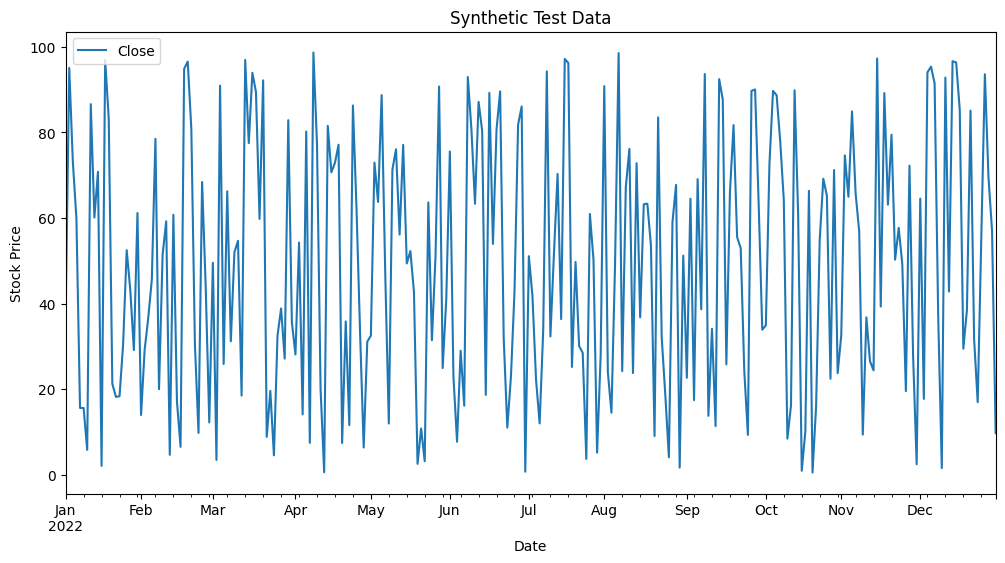

In [ ]:
#Test daatset creation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
date_rng = pd.date_range(start='2022-01-01', end='2023-01-01', freq='B')
synthetic_data = pd.DataFrame(index=date_rng)
synthetic_data['Close'] = np.random.rand(len(date_rng)) * 100  # Replace with your own logic for synthetic data

# Save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_test_data.csv')

# Display the synthetic data
synthetic_data.plot(figsize=(12, 6), title='Synthetic Test Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


         Date        Open        High         Low       Close   Adj Close  \
0  2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
1  2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669968   
2  2022-01-05  179.610001  180.169998  174.639999  174.919998  172.944000   
3  2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
4  2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   

      Volume  
0  104487900  
1   99310400  
2   94537600  
3   96904000  
4   86709100  
Epoch 1/10
6/6 [==============================] - 6s 76ms/step - loss: 0.1268
Epoch 2/10
6/6 [==============================] - 0s 76ms/step - loss: 0.0384
Epoch 3/10
6/6 [==============================] - 0s 78ms/step - loss: 0.0327
Epoch 4/10
6/6 [==============================] - 0s 73ms/step - loss: 0.0255
Epoch 5/10
6/6 [==============================] - 0s 72ms/step - loss: 0.0241
Epoch 6/10
6/6 [==============================] - 0s 68ms

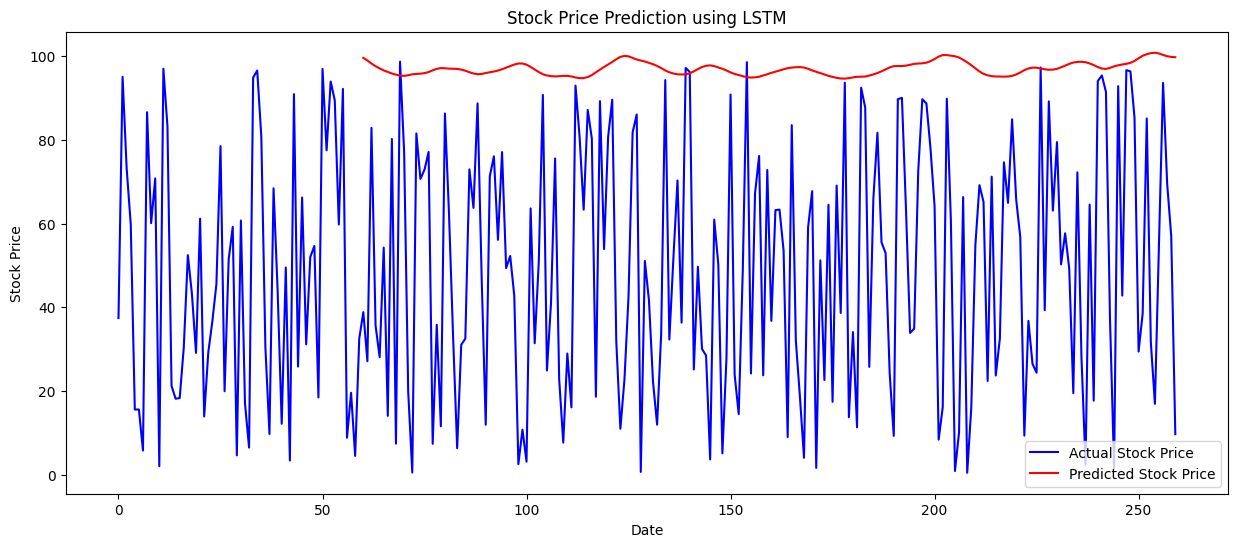

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the stock price data
# Replace 'your_stock_data.csv' with the actual filename or URL of your dataset
data = pd.read_csv('stock_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Use the 'Close' prices for prediction
data = data[['Close']]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create a dataset with input features and labels
def create_dataset(data, time_steps=1):
    x_data, y_data = [], []
    for i in range(len(data) - time_steps):
        x_data.append(data[i:(i + time_steps), 0])
        y_data.append(data[i + time_steps, 0])
    return np.array(x_data), np.array(y_data)

# Set the time steps for the LSTM model
time_steps = 60

# Create the dataset
x, y = create_dataset(data_scaled, time_steps)

# Reshape the data for LSTM input (samples, time steps, features)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=10, batch_size=32)

# Test the model on new data
test_data = pd.read_csv('synthetic_test_data.csv')  # Replace with the actual test dataset
test_data = test_data[['Close']]
scaled_test_data = scaler.transform(test_data)

# Create test dataset
x_test, y_test = create_dataset(scaled_test_data, time_steps)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Stock Price', color='blue')
plt.plot(test_data.index[time_steps:], predictions, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import locale

# Load stock price data
# Make sure 'stock_data.csv' contains 'Date' and 'Close' columns
data = pd.read_csv('stock_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Extract 'Date' and 'Close' columns
data = data[['Date', 'Close']]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Function to create a dataset with input features and labels
def create_dataset(data, time_steps=1):
    x_data, y_data, dates = [], [], []
    for i in range(len(data) - time_steps):
        x_data.append(data[i:(i + time_steps), 0])
        y_data.append(data[i + time_steps, 0])
        dates.append(data[i + time_steps, 0])  # Adjusted indexing for 'Date' column
    return np.array(x_data), np.array(y_data), np.array(dates)

# Set time steps for the LSTM model
time_steps = 60

# Create the dataset
x, y, dates = create_dataset(data_scaled, time_steps)

# Reshape the data for LSTM input (samples, time steps, features)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x, y, epochs=10, batch_size=32)

# User input for stock details
stock_name = input("Enter the stock name: ")
action = input("Do you want to buy or sell? ").lower()
quantity = int(input("Enter the quantity: "))
trading_type = input("Enter the trading type (e.g., intraday, swing): ")

# Prepare user input for prediction
user_input = np.array([data_scaled[-time_steps:, 0]])
user_input = np.reshape(user_input, (1, time_steps, 1))

# Make predictions
predicted_price = model.predict(user_input)
predicted_price = scaler.inverse_transform(predicted_price)[0][0]

# Get the current stock price
current_price = data['Close'].iloc[-1]

# Display the predicted and current prices
print(f"\nCurrent Stock Price for {stock_name}: {current_price:.2f} INR")
print(f"Predicted Stock Price for {stock_name}: {predicted_price:.2f} INR")

# Suggest buy/sell based on the predicted price and trading type
if action == 'buy':
    if trading_type == 'intraday':
        suggested_price = current_price  # Intraday trading suggests the current price
        print(f"Suggest: Buy for Intraday trading at {current_price:.2f} INR")
    elif trading_type == 'swing':
        suggested_price = predicted_price  # Swing trading suggests the predicted price
        # Provide additional suggestions based on historical data, e.g., holding period
        print(f"Suggest: Buy for Swing trading at {predicted_price:.2f} INR")
        print(f"Suggested Holding Period: 7 days")
        sell_date = data['Date'].iloc[-1]
        print(f"Suggested Sell Date: {sell_date}")
    else:
        print("Invalid trading type. Please choose 'intraday' or 'swing'.")
elif action == 'sell':
    if trading_type == 'intraday':
        suggested_price = current_price  # Intraday trading suggests the current price
        print(f"Suggest: Sell for Intraday trading at {current_price:.2f} INR")
    elif trading_type == 'swing':
        suggested_price = predicted_price  # Swing trading suggests the predicted price
        # Provide additional suggestions based on historical data, e.g., holding period
        print(f"Suggest: Sell for Swing trading at {predicted_price:.2f} INR")
        print(f"Suggested Holding Period: 7 days")
        sell_date = data['Date'].iloc[-1]
        print(f"Suggested Sell Date: {sell_date}")
    else:
        print("Invalid trading type. Please choose 'intraday' or 'swing'.")
else:
    print("Invalid action. Please choose 'buy' or 'sell'.")


         Date        Open        High         Low       Close   Adj Close  \
0  2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
1  2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669968   
2  2022-01-05  179.610001  180.169998  174.639999  174.919998  172.944000   
3  2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
4  2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   

      Volume  
0  104487900  
1   99310400  
2   94537600  
3   96904000  
4   86709100  
Epoch 1/10
6/6 [==============================] - 6s 74ms/step - loss: 0.1208
Epoch 2/10
6/6 [==============================] - 1s 111ms/step - loss: 0.0479
Epoch 3/10
6/6 [==============================] - 1s 129ms/step - loss: 0.0370
Epoch 4/10
6/6 [==============================] - 1s 123ms/step - loss: 0.0260
Epoch 5/10
6/6 [==============================] - 1s 127ms/step - loss: 0.0289
Epoch 6/10
6/6 [==============================] - 1s 

1/1 [==============================] - 1s 1s/step

Current Stock Price for ircon: 129.93 INR
Predicted Stock Price for ircon: 136.99 INR
Suggest: Buy for Swing trading at 136.99 INR
Suggested Holding Period: 7 days
Suggested Sell Date: 2022-12-30
